<a href="https://colab.research.google.com/github/shouvikpal8991/Assignment-3/blob/main/Assig3pr11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

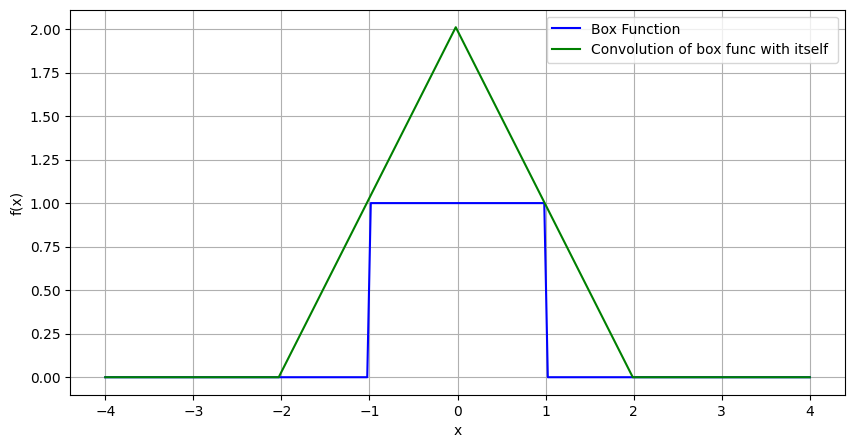

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.where(np.logical_and(x < 1.0, x > -1.0), 1, 0)

x_min = -4
x_max = 4
num_points = 200
dx = (x_max - x_min) / (num_points - 1)

x_arr = np.linspace(x_min, x_max, num_points)
sampled_data = f(x_arr)

# Define the convolution function
def convolution(f, g, dx, n):

    # zero padding the function
    f_padded = np.pad(f, (0, len(g)), mode='constant')
    g_padded = np.pad(g, (0, len(f)), mode='constant')
    # Taking discrete fourier transform using np.fft.fft
    f_dft = np.fft.fft(f_padded, norm = 'ortho')
    g_dft = np.fft.fft(g_padded, norm = 'ortho')
    #multiplying the fourier transform results
    h_dft = f_dft * g_dft
    #Taking inverse fourier transform of the result
    convo = np.fft.ifft(h_dft, norm = 'ortho').real
    # Scale by dx
    convolved_function=convo * dx * np.sqrt(2*n)
    return convolved_function

#convolution of boxfunction with itself
box=f(x_arr)
box_convo_box=convolution(box,box,dx,num_points)
convo_result =box_convo_box[int(num_points/2):int(-num_points/2)]

# Plot the box function
plt.figure(figsize=(10, 5))
plt.plot(x_arr, sampled_data, label='Box Function', color = 'b')
# Plot the convolution result
plt.plot(x_arr, convo_result[:len(x_arr)], label='Convolution of box func with itself ', color = 'g')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
